# Image Filtering - Signal Processing 2024/2025

### Author: Pablo Mollá

## 0. Libraries

In [2]:
import os
from PIL import Image
import numpy as np
from scipy.fftpack import fft2, fftshift
from scipy.ndimage import gaussian_filter
import cv2
from scipy.ndimage import convolve, sobel
import matplotlib.pyplot as plt

## 1. Loading the Data

Pixels: (1080, 1920)
First Vector of Data: [134 184 207 ... 255 176  29]


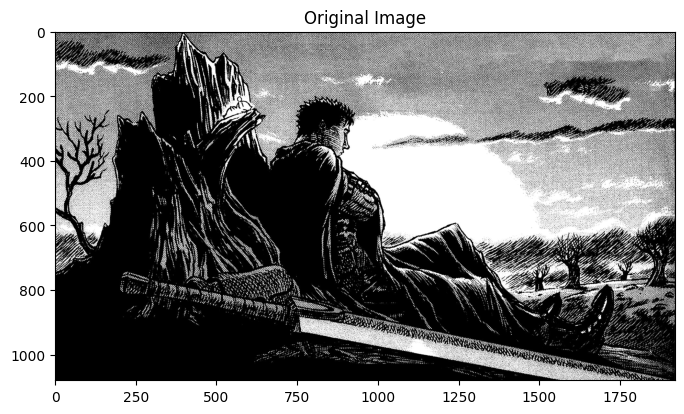

In [4]:
# Load an image (Convert to grayscale)
# 'L' converts to grayscale
file_path = '/Users/pablomollacharlez/Desktop/M2_DS/Signal_Processing/Lab_1/berserk.jpg'
image = Image.open(file_path).convert('L')
image_data = np.array(image)
print(f"Pixels: {image_data.shape}")
print("First Vector of Data:", image_data[0])

plt.figure(figsize=(8, 8))
plt.imshow(image_data, cmap='gray')
plt.title('Original Image')
plt.show()

## 2. Gradient Filter 

1. $\underline{\text{Explanation}}$:

    The gradient filter $\textcolor{red}{\text{computes the rate of change in pixel intensity between neighboring}}$ $\textcolor{red}{\text{pixels}}$, emphasizing areas where the intensity changes rapidly—usually edges or boundaries in the image. It works by calculating the difference between adjacent pixels in both the horizontal $(x)$ and vertical $(y)$ directions, and then combining these differences to get the overall magnitude of the gradient.

2. $\underline{\text{Real-World Application Example}}$:

- $\fbox{Edge Detection}$: The gradient filter is used in basic edge detection tasks, where the goal is to find the outlines of objects or regions within an image. It helps highlight transitions between different areas, such as detecting the boundary between the sky and buildings in an outdoor scene.

- $\fbox{Object Detection}$: In computer vision, gradient filters are often the first step in detecting the boundaries of objects, such as detecting cars or pedestrians in self-driving cars.

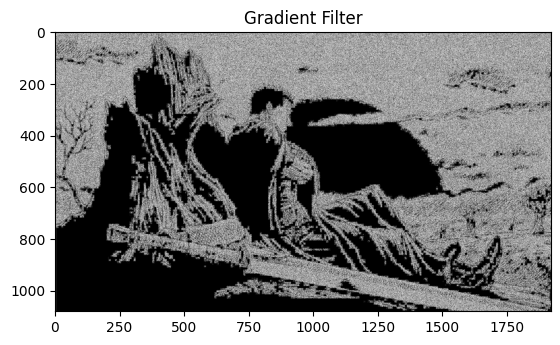

In [5]:
def gradient_filter(image_data):
    # Compute the gradient along x and y axis
    grad_x = np.diff(image_data, axis=1)
    grad_y = np.diff(image_data, axis=0)

    # Pad the arrays to keep the original size
    grad_x = np.pad(grad_x, ((0, 0), (0, 1)), mode='constant')
    grad_y = np.pad(grad_y, ((0, 1), (0, 0)), mode='constant')

    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    return gradient_magnitude

# Apply the Gradient Filter
grad_image = gradient_filter(image_data)
plt.imshow(grad_image, cmap='gray')
plt.title('Gradient Filter')
plt.show()


## 3. Sobel Filter 

1. $\underline{\text{Explanation}}$:

    The Sobel filter is an $\textcolor{red}{\text{extension of the gradient filter}}$. It uses a $\textcolor{blue}{\text{convolution operation with specific Sobel kernels}}$ to compute the gradient in both the x and y directions. The result emphasizes edges, but with more smoothing than the simple gradient filter, making it more resistant to noise.

2. $\underline{\text{Real-World Application Example}}$:

- $\fbox{Edge and Contour Detection}$: The Sobel filter is widely used for detecting edges and contours in images. It’s especially useful for detecting diagonal edges, as it takes into account changes in intensity across multiple neighboring pixels.

- $\fbox{Medical Imaging}$: In medical imaging, Sobel filters are used to detect edges in scans like X-rays or MRIs, helping doctors identify boundaries of organs, bones, or tumors.

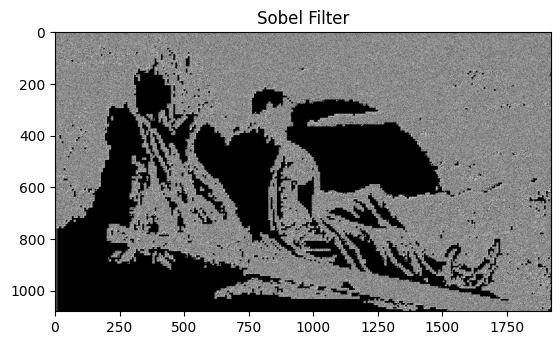

In [6]:
def sobel_filter(image_data):
    # Apply Sobel filter along x and y directions
    sobel_x = sobel(image_data, axis=1)  # Gradient in x direction
    sobel_y = sobel(image_data, axis=0)  # Gradient in y direction

    # Compute Sobel magnitude
    sobel_magnitude = np.hypot(sobel_x, sobel_y)

    return sobel_magnitude

# Apply the Sobel Filter
sobel_image = sobel_filter(image_data)
plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel Filter')
plt.show()


## 4. Averaging Filter

1. $\underline{\text{Explanation}}$:

    The averaging filter, also known as the mean filter, $\textcolor{red}{\text{smooths the image by replacing each pixel with the average value of its neighbors}}$. This reduces noise but also blurs the image, softening edges and details.

2. $\underline{\text{Real-World Application Example}}$:

- $\fbox{Noise Reduction}$: This filter is often used in situations where the image contains random noise (such as graininess or small fluctuations in intensity). It averages out these small variations, resulting in a cleaner image.

- $\fbox{Photography Post-Processing}$: In digital photography, averaging filters can be used to remove high-frequency noise (e.g., sensor noise or grain) from photos taken in low light conditions.

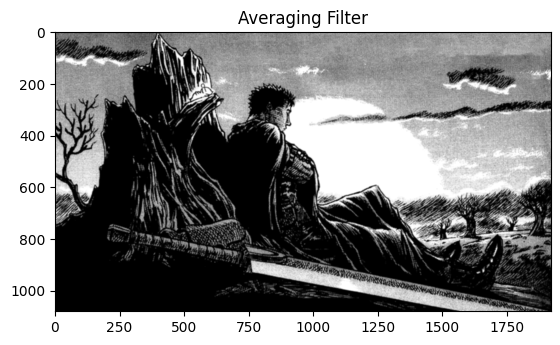

In [7]:
def averaging_filter(image_data, kernel_size=5):
    # Create a kernel with equal weights (simple average)
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size**2)

    # Apply the averaging filter (convolution)
    averaged_image = convolve(image_data, kernel)

    return averaged_image

# Apply the Averaging Filter
avg_image = averaging_filter(image_data)
plt.imshow(avg_image, cmap='gray')
plt.title('Averaging Filter')
plt.show()


The Averaging Filter technique depends highly on the kernel_size parameter:

- Larger kernel size: Greater smoothing but more blurring and loss of detail.
- Smaller kernel size: Less smoothing, better edge preservation.

## 5. Gaussian Filter

1. $\underline{\text{Explanation}}$:

    The Gaussian filter is a type of $\textcolor{red}{\text{smoothing filter that uses a Gaussian function to weigh pixels in the neighborhood}}$. It $\textcolor{blue}{\text{assigns more weight to nearby pixels and less weight to farther pixels}}$. This approach smooths the image while preserving important structures better than the averaging filter.

2. $\underline{\text{Real-World Application Example}}$:

- $\fbox{Blurring}$: The Gaussian filter is often used to blur images, but in a controlled way that retains important edges. It’s also used as a preprocessing step in other image processing tasks like edge detection, as it helps reduce noise without overly blurring edges.

- $\fbox{Image Preprocessing in Face Detection}$: In face detection algorithms (e.g., used by smartphones), the Gaussian filter is used to blur the image slightly before detecting facial features. This helps reduce the impact of noise and makes the detection algorithm more accurate.

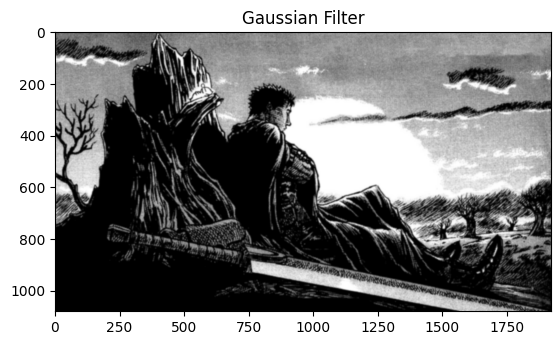

In [9]:
def gaussian_filter_image(image_data, sigma=1.0):
    # Apply Gaussian filter using scipy's gaussian_filter function
    blurred_image = gaussian_filter(image_data, sigma=sigma)

    return blurred_image

# Apply the Gaussian Filter
gaussian_image = gaussian_filter_image(image_data, sigma=2)
plt.imshow(gaussian_image, cmap='gray')
plt.title('Gaussian Filter')
plt.show()


The Gaussian Filter technique depends as well on the parameter sigma:

- Larger sigma: More blurring, with more distant pixels contributing to the smoothing, which leads to a significant softening of edges and a reduction in fine detail.
- Smaller sigma: Less blurring, preserving fine details and edges, as only nearby pixels contribute significantly to the averaging process.